# Example

Let us take some of our old dataset as an example. This is an continuation of the horse colic dataset from Logistic regression.

In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

Now we build a neural network. This is a 2-layer model, with 1 hidden layer with 10 nodes.

In [7]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)


And the learning curve are shown in the following plots.

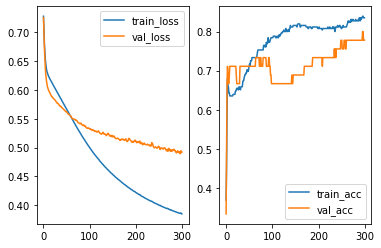

In [8]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

It seems that our model has overfitting issues. Therefore we need to modifify the architects of our model. The first idea is to add `L2` regularization as we talked about it in LogsiticRegression case. Here we use `0.01` as the regularization strenth.

Let us add the layer to the model and retrain it.

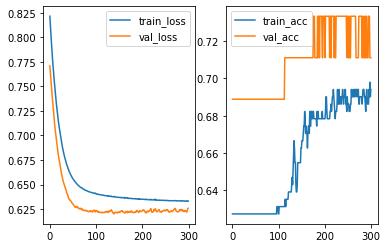

In [26]:
from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

Another way to deal with overfitting is to add a `Dropout` layer. The idea is that when training the model, part of the data will be randomly discarded. Then after fitting, the model tends to reduce the variance, and then reduce the overfitting. 

The code of a `Dropout` layer is listed below. Note that the number represents the percentage of the training data that will be dropped.

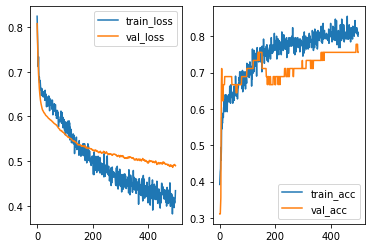

In [30]:
from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

After playing with different hyperparameters, the overfitting issues seem to be better (but not entirely fixed). However, the overall performance is getting worse. This means that the model is moving towards underfitting side. Then we may add more layers to make the model more complicated in order to capture more information.

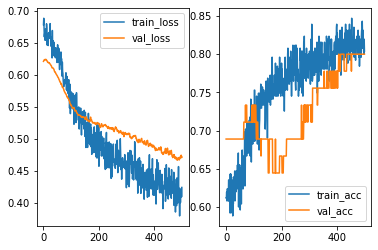

In [36]:
from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

As you may see, to build a netural network model it requires many testing. There are many established models. When you build your own architecture, you may start from there and modify it to fit your data.